# Лабораторная работа №5.
## Catboost. Градиентный бустинг

В достаточной степени подробно о градиентном бустинге описано в статье:
* https://habr.com/ru/company/ods/blog/327250/

Документация Catboost доступна по ссылке:
* https://tech.yandex.ru/catboost/

In [9]:
!pip install catboost # установим catboost

Invalid requirement: '#'
Traceback (most recent call last):
  File "C:\Users\Anna\Anaconda3\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "C:\Users\Anna\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "C:\Users\Anna\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "C:\Users\Anna\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Users\Anna\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "C:\Users\Anna\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Use

In [35]:
#import numpy as np
#import pandas as pd
#import catboost as cb
#import seaborn as sns
#import matplotlib.pyplot as plt

#%matplotlib inline
!pip install catboost

import numpy as np
import pandas as pd
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn import datasets

%matplotlib inline

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
iris = sns.load_dataset('iris')

In [37]:
iris.head() # четыре признака: sepal_length, sepal_width, petal_length, petal_width

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
pd.unique(iris.species) # классы, которые нужно предсказать

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Задание 1
Преобразуйте метки классов колонки species в численный вид. Просмотрите датасет, постройте графики (гистограммы, зависимости) и очистите его от дубликатов и пустых строк, если таковые имеются.

In [39]:
h = {'setosa' : 0, 'versicolor' : 1,'virginica' : 2}
iris['species'] = iris['species'].map(h)


C:\Users\Anna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Anna\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Anna\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


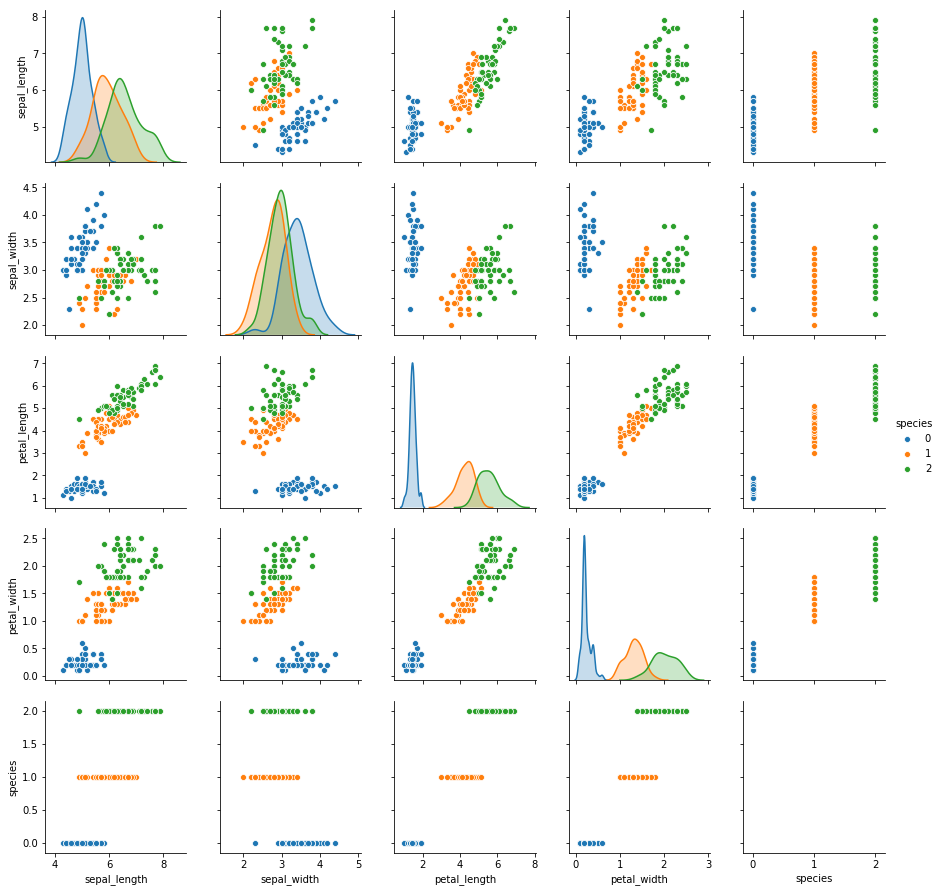

In [40]:
sns.pairplot (iris, hue = "species")

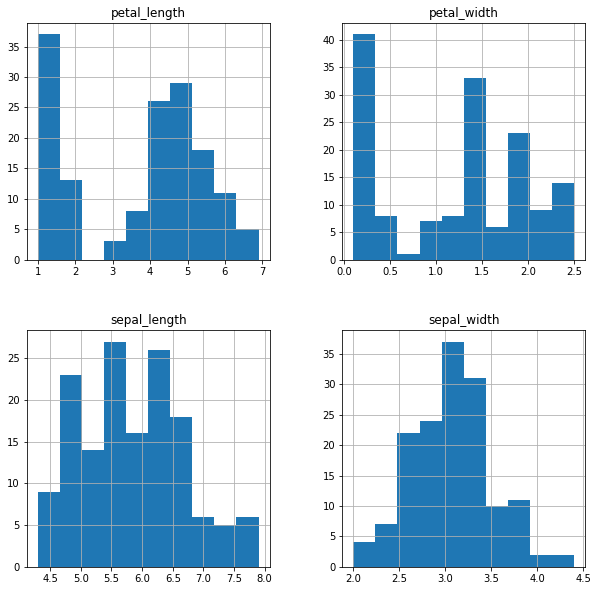

In [41]:
f = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris[f].hist(figsize=(10,10));

In [42]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [44]:
iris_1=iris.drop_duplicates(subset=None , keep='first', inplace=False ) 
iris_1.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Задание 2
Получите новые бинарные признаки, например: постройте график зависимости iris.sepal_length от iris.sepal_width и окрасьте точки в зависимости от iris.species. Мы видим, что один класс можно легко выделить, если взять iris.sepal_length < 6 и iris.sepal_width > 3. Создайте 5 бинарных признаков.

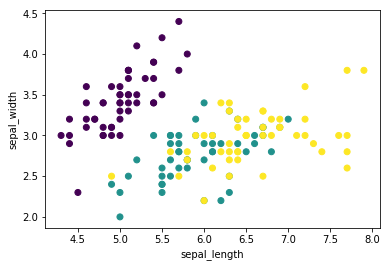

In [45]:
x = iris_1.sepal_length
y = iris_1.sepal_width  
 
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.scatter(x, y, c=iris_1.species)
plt.show()

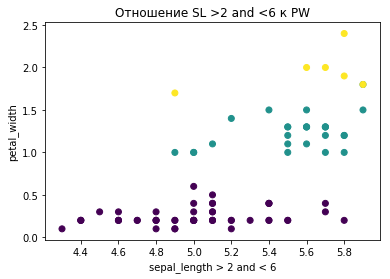

In [47]:
f2 = iris_1[(iris_1['sepal_length'] > 2) & (iris_1['sepal_length'] < 6)]
 
x = f2.sepal_length
y = f2.petal_width

#x.info()
#y.info()

plt.xlabel('sepal_length > 2 and < 6')
plt.ylabel('petal_width')
plt.scatter(x, y, c=f2.species)
plt.title('Отношение SL >2 and <6 к PW')
plt.show()

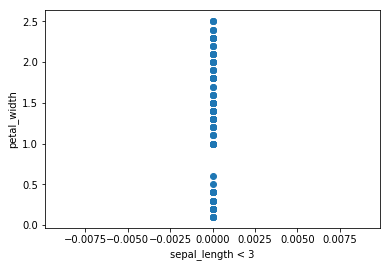

In [52]:
f3 = np.zeros(iris_1.shape[0])
f3[np.where(iris_1.sepal_length < 3)] = 1

x = f3
y = iris_1.petal_width
plt.xlabel('sepal_length < 3')
plt.ylabel('petal_width')
plt.scatter(x, y)
plt.show()

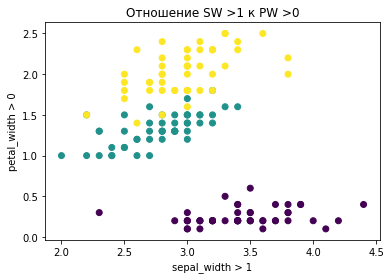

In [58]:
f4 = iris_1[(iris_1['sepal_width'] > 1) & (iris_1['petal_width'] > 0)]
 
x = f4.sepal_width
y = f4.petal_width


plt.xlabel('sepal_width > 1')
plt.ylabel('petal_width > 0')
plt.scatter(x, y, c=f4.species)
plt.title('Отношение SW >1 к PW >0')
plt.show()

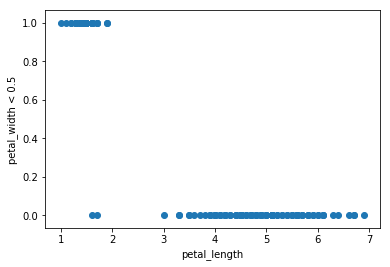

In [61]:
f5 = np.zeros(iris_1.shape[0])
f5[np.where(iris_1.petal_width < 0.5)] = 1


x = iris_1.petal_length
y = f5
plt.xlabel('petal_length')
plt.ylabel('petal_width < 0.5')
plt.scatter(x,y)
plt.show()

### Задание 3
По ссылке https://catboost.ai/docs/concepts/python-usages-examples.html изучите возможности применения catboost.
* Создайте модель Catboost.Classifier
* Перемешайте данные
* Отберите 10 % данных для валидации
* Создайте объекты Pool для классификационных данных и валидационных, заполните cat_features индексами бинарных признаков 
* Выберите функцию ошибки для данной задачи, объясните свой выбор
* Обучите модель и оцените ошибку на валидационных данных, объясните результат

In [68]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation 
from pandas import DataFrame
import catboost
from catboost import CatBoostClassifier , Pool
%pylab inline

iris = datasets.load_iris()
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame
m = catboost.CatBoostClassifier(loss_function='MultiClass')
m.fit(iris.data, iris.target)

Populating the interactive namespace from numpy and matplotlib
0:	learn: -1.0571453	total: 22.9ms	remaining: 22.9s
1:	learn: -1.0253734	total: 40ms	remaining: 19.9s
2:	learn: -0.9943168	total: 53.5ms	remaining: 17.8s
3:	learn: -0.9619947	total: 66ms	remaining: 16.4s
4:	learn: -0.9349442	total: 81.5ms	remaining: 16.2s
5:	learn: -0.9074849	total: 94.6ms	remaining: 15.7s
6:	learn: -0.8804875	total: 105ms	remaining: 14.8s
7:	learn: -0.8565491	total: 115ms	remaining: 14.3s
8:	learn: -0.8287516	total: 120ms	remaining: 13.2s
9:	learn: -0.8032069	total: 131ms	remaining: 13s
10:	learn: -0.7787833	total: 144ms	remaining: 13s
11:	learn: -0.7571021	total: 155ms	remaining: 12.7s
12:	learn: -0.7344302	total: 165ms	remaining: 12.5s
13:	learn: -0.7150964	total: 177ms	remaining: 12.5s
14:	learn: -0.6953170	total: 187ms	remaining: 12.3s
15:	learn: -0.6768361	total: 197ms	remaining: 12.1s
16:	learn: -0.6608039	total: 208ms	remaining: 12s
17:	learn: -0.6437625	total: 224ms	remaining: 12.2s
18:	learn: -0.6

167:	learn: -0.1007473	total: 2.05s	remaining: 10.1s
168:	learn: -0.1002730	total: 2.06s	remaining: 10.1s
169:	learn: -0.0998296	total: 2.07s	remaining: 10.1s
170:	learn: -0.0992929	total: 2.09s	remaining: 10.1s
171:	learn: -0.0988501	total: 2.11s	remaining: 10.2s
172:	learn: -0.0983797	total: 2.12s	remaining: 10.2s
173:	learn: -0.0977259	total: 2.14s	remaining: 10.2s
174:	learn: -0.0973417	total: 2.15s	remaining: 10.1s
175:	learn: -0.0969611	total: 2.16s	remaining: 10.1s
176:	learn: -0.0965207	total: 2.17s	remaining: 10.1s
177:	learn: -0.0960900	total: 2.19s	remaining: 10.1s
178:	learn: -0.0953991	total: 2.2s	remaining: 10.1s
179:	learn: -0.0949953	total: 2.21s	remaining: 10.1s
180:	learn: -0.0945248	total: 2.22s	remaining: 10s
181:	learn: -0.0941436	total: 2.23s	remaining: 10s
182:	learn: -0.0936274	total: 2.24s	remaining: 10s
183:	learn: -0.0932219	total: 2.25s	remaining: 9.98s
184:	learn: -0.0925269	total: 2.26s	remaining: 9.96s
185:	learn: -0.0921436	total: 2.27s	remaining: 9.96s


330:	learn: -0.0507223	total: 4.02s	remaining: 8.12s
331:	learn: -0.0504048	total: 4.04s	remaining: 8.13s
332:	learn: -0.0502553	total: 4.05s	remaining: 8.12s
333:	learn: -0.0500781	total: 4.08s	remaining: 8.13s
334:	learn: -0.0497069	total: 4.09s	remaining: 8.12s
335:	learn: -0.0495954	total: 4.09s	remaining: 8.09s
336:	learn: -0.0494802	total: 4.11s	remaining: 8.08s
337:	learn: -0.0493035	total: 4.12s	remaining: 8.07s
338:	learn: -0.0491862	total: 4.13s	remaining: 8.06s
339:	learn: -0.0490736	total: 4.15s	remaining: 8.05s
340:	learn: -0.0489805	total: 4.16s	remaining: 8.05s
341:	learn: -0.0488599	total: 4.18s	remaining: 8.05s
342:	learn: -0.0487938	total: 4.19s	remaining: 8.03s
343:	learn: -0.0486782	total: 4.21s	remaining: 8.02s
344:	learn: -0.0485592	total: 4.23s	remaining: 8.03s
345:	learn: -0.0484642	total: 4.24s	remaining: 8.02s
346:	learn: -0.0481630	total: 4.26s	remaining: 8.01s
347:	learn: -0.0480071	total: 4.27s	remaining: 8s
348:	learn: -0.0479256	total: 4.28s	remaining: 7.

487:	learn: -0.0324276	total: 5.98s	remaining: 6.28s
488:	learn: -0.0323063	total: 6s	remaining: 6.27s
489:	learn: -0.0322507	total: 6.01s	remaining: 6.26s
490:	learn: -0.0321216	total: 6.03s	remaining: 6.25s
491:	learn: -0.0320675	total: 6.04s	remaining: 6.23s
492:	learn: -0.0320325	total: 6.05s	remaining: 6.22s
493:	learn: -0.0320027	total: 6.07s	remaining: 6.21s
494:	learn: -0.0318630	total: 6.08s	remaining: 6.2s
495:	learn: -0.0318288	total: 6.09s	remaining: 6.19s
496:	learn: -0.0317650	total: 6.11s	remaining: 6.18s
497:	learn: -0.0315797	total: 6.12s	remaining: 6.17s
498:	learn: -0.0313912	total: 6.14s	remaining: 6.16s
499:	learn: -0.0313613	total: 6.15s	remaining: 6.15s
500:	learn: -0.0313085	total: 6.17s	remaining: 6.14s
501:	learn: -0.0311416	total: 6.18s	remaining: 6.13s
502:	learn: -0.0310156	total: 6.19s	remaining: 6.12s
503:	learn: -0.0309527	total: 6.21s	remaining: 6.11s
504:	learn: -0.0308549	total: 6.22s	remaining: 6.09s
505:	learn: -0.0307196	total: 6.23s	remaining: 6.0

654:	learn: -0.0223642	total: 8.45s	remaining: 4.45s
655:	learn: -0.0223298	total: 8.46s	remaining: 4.44s
656:	learn: -0.0222801	total: 8.48s	remaining: 4.43s
657:	learn: -0.0222454	total: 8.5s	remaining: 4.42s
658:	learn: -0.0221708	total: 8.51s	remaining: 4.41s
659:	learn: -0.0220690	total: 8.53s	remaining: 4.39s
660:	learn: -0.0219871	total: 8.54s	remaining: 4.38s
661:	learn: -0.0219749	total: 8.55s	remaining: 4.37s
662:	learn: -0.0219420	total: 8.56s	remaining: 4.35s
663:	learn: -0.0218966	total: 8.58s	remaining: 4.34s
664:	learn: -0.0218613	total: 8.59s	remaining: 4.33s
665:	learn: -0.0218151	total: 8.6s	remaining: 4.31s
666:	learn: -0.0217506	total: 8.61s	remaining: 4.3s
667:	learn: -0.0217048	total: 8.63s	remaining: 4.29s
668:	learn: -0.0216781	total: 8.64s	remaining: 4.28s
669:	learn: -0.0216590	total: 8.65s	remaining: 4.26s
670:	learn: -0.0216341	total: 8.67s	remaining: 4.25s
671:	learn: -0.0216043	total: 8.68s	remaining: 4.24s
672:	learn: -0.0215501	total: 8.7s	remaining: 4.2

821:	learn: -0.0169163	total: 10.7s	remaining: 2.31s
822:	learn: -0.0168992	total: 10.7s	remaining: 2.3s
823:	learn: -0.0168583	total: 10.7s	remaining: 2.29s
824:	learn: -0.0168284	total: 10.7s	remaining: 2.28s
825:	learn: -0.0168158	total: 10.7s	remaining: 2.26s
826:	learn: -0.0168048	total: 10.8s	remaining: 2.25s
827:	learn: -0.0167890	total: 10.8s	remaining: 2.24s
828:	learn: -0.0167643	total: 10.8s	remaining: 2.22s
829:	learn: -0.0167565	total: 10.8s	remaining: 2.21s
830:	learn: -0.0167439	total: 10.8s	remaining: 2.2s
831:	learn: -0.0167102	total: 10.8s	remaining: 2.18s
832:	learn: -0.0166889	total: 10.8s	remaining: 2.17s
833:	learn: -0.0166496	total: 10.8s	remaining: 2.16s
834:	learn: -0.0166403	total: 10.9s	remaining: 2.15s
835:	learn: -0.0166218	total: 10.9s	remaining: 2.13s
836:	learn: -0.0166140	total: 10.9s	remaining: 2.12s
837:	learn: -0.0165782	total: 10.9s	remaining: 2.11s
838:	learn: -0.0165666	total: 10.9s	remaining: 2.09s
839:	learn: -0.0165439	total: 10.9s	remaining: 2

987:	learn: -0.0136448	total: 13.4s	remaining: 162ms
988:	learn: -0.0136343	total: 13.4s	remaining: 149ms
989:	learn: -0.0136246	total: 13.4s	remaining: 135ms
990:	learn: -0.0136099	total: 13.4s	remaining: 122ms
991:	learn: -0.0135854	total: 13.4s	remaining: 108ms
992:	learn: -0.0135571	total: 13.4s	remaining: 94.8ms
993:	learn: -0.0135496	total: 13.5s	remaining: 81.2ms
994:	learn: -0.0135427	total: 13.5s	remaining: 67.7ms
995:	learn: -0.0135348	total: 13.5s	remaining: 54.2ms
996:	learn: -0.0135286	total: 13.5s	remaining: 40.6ms
997:	learn: -0.0135008	total: 13.5s	remaining: 27.1ms
998:	learn: -0.0134951	total: 13.5s	remaining: 13.5ms
999:	learn: -0.0134814	total: 13.5s	remaining: 0us


In [70]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.1, random_state = 0)

#cat_feat = list(range(0,train_data.shape[1]))
#print (cat_feat)
print (train_data)
print (test_data)
print (train_labels)
print (test_labels)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
37                 4.9               3.1                1.5               0.1
78                 6.0               2.9                4.5               1.5
90                 5.5               2.6                4.4               1.2
45                 4.8               3.0                1.4               0.3
16                 5.4               3.9                1.3               0.4
121                5.6               2.8                4.9               2.0
66                 5.6               3.0                4.5               1.5
24                 4.8               3.4                1.9               0.2
8                  4.4               2.9                1.4               0.2
126                6.2               2.8                4.8               1.8
22                 4.6               3.6                1.0               0.2
44                 5.1               3.8                1.9     

In [72]:
test_pool = Pool(data=test_data, label=test_labels)

models = []
for i in range(5):
    model = CatBoostClassifier(loss_function="MultiClass",iterations=100, random_seed=i)
    model.fit(train_data,train_labels, eval_set=test_pool)
    print('Model is fitted: ' + str(model.is_fitted()))
    print('Model params:')
    print(model.get_params())

0:	learn: -1.0635228	test: -1.0639261	best: -1.0639261 (0)	total: 50.5ms	remaining: 5s
1:	learn: -1.0317361	test: -1.0295347	best: -1.0295347 (1)	total: 59ms	remaining: 2.89s
2:	learn: -0.9994758	test: -1.0028548	best: -1.0028548 (2)	total: 69.5ms	remaining: 2.25s
3:	learn: -0.9667811	test: -0.9761557	best: -0.9761557 (3)	total: 80.5ms	remaining: 1.93s
4:	learn: -0.9398495	test: -0.9594806	best: -0.9594806 (4)	total: 90ms	remaining: 1.71s
5:	learn: -0.9128126	test: -0.9350696	best: -0.9350696 (5)	total: 97.1ms	remaining: 1.52s
6:	learn: -0.8871389	test: -0.9118421	best: -0.9118421 (6)	total: 105ms	remaining: 1.39s
7:	learn: -0.8623226	test: -0.8845858	best: -0.8845858 (7)	total: 114ms	remaining: 1.31s
8:	learn: -0.8360229	test: -0.8619219	best: -0.8619219 (8)	total: 123ms	remaining: 1.25s
9:	learn: -0.8138071	test: -0.8403502	best: -0.8403502 (9)	total: 130ms	remaining: 1.17s
10:	learn: -0.7927907	test: -0.8146278	best: -0.8146278 (10)	total: 136ms	remaining: 1.1s
11:	learn: -0.7709816

Model is fitted: True
Model params:
{'iterations': 100, 'loss_function': 'MultiClass', 'random_seed': 0}
0:	learn: -1.0601388	test: -1.0625202	best: -1.0625202 (0)	total: 8.11ms	remaining: 803ms
1:	learn: -1.0290916	test: -1.0300723	best: -1.0300723 (1)	total: 16ms	remaining: 786ms
2:	learn: -0.9988269	test: -1.0039831	best: -1.0039831 (2)	total: 25.4ms	remaining: 822ms
3:	learn: -0.9706230	test: -0.9749530	best: -0.9749530 (3)	total: 36ms	remaining: 863ms
4:	learn: -0.9397300	test: -0.9467599	best: -0.9467599 (4)	total: 42.3ms	remaining: 804ms
5:	learn: -0.9176594	test: -0.9249809	best: -0.9249809 (5)	total: 50.5ms	remaining: 791ms
6:	learn: -0.8935836	test: -0.9033146	best: -0.9033146 (6)	total: 56.8ms	remaining: 754ms
7:	learn: -0.8661021	test: -0.8764875	best: -0.8764875 (7)	total: 64.6ms	remaining: 743ms
8:	learn: -0.8418089	test: -0.8569308	best: -0.8569308 (8)	total: 72.8ms	remaining: 736ms
9:	learn: -0.8175211	test: -0.8361468	best: -0.8361468 (9)	total: 81.3ms	remaining: 732ms

99:	learn: -0.1792064	test: -0.2070468	best: -0.2070468 (99)	total: 778ms	remaining: 0us

bestTest = -0.2070468456
bestIteration = 99

Model is fitted: True
Model params:
{'iterations': 100, 'loss_function': 'MultiClass', 'random_seed': 1}
0:	learn: -1.0632890	test: -1.0569563	best: -1.0569563 (0)	total: 6.46ms	remaining: 639ms
1:	learn: -1.0292059	test: -1.0258432	best: -1.0258432 (1)	total: 17ms	remaining: 834ms
2:	learn: -0.9946481	test: -0.9915942	best: -0.9915942 (2)	total: 25.3ms	remaining: 818ms
3:	learn: -0.9612670	test: -0.9628418	best: -0.9628418 (3)	total: 36ms	remaining: 864ms
4:	learn: -0.9318055	test: -0.9423264	best: -0.9423264 (4)	total: 44.2ms	remaining: 839ms
5:	learn: -0.9082124	test: -0.9228130	best: -0.9228130 (5)	total: 52ms	remaining: 814ms
6:	learn: -0.8815142	test: -0.8958762	best: -0.8958762 (6)	total: 58.6ms	remaining: 779ms
7:	learn: -0.8632437	test: -0.8878191	best: -0.8878191 (7)	total: 66.8ms	remaining: 769ms
8:	learn: -0.8390267	test: -0.8642515	best: -0

95:	learn: -0.1864209	test: -0.2196221	best: -0.2196221 (95)	total: 802ms	remaining: 33.4ms
96:	learn: -0.1846771	test: -0.2173327	best: -0.2173327 (96)	total: 811ms	remaining: 25.1ms
97:	learn: -0.1825902	test: -0.2150184	best: -0.2150184 (97)	total: 824ms	remaining: 16.8ms
98:	learn: -0.1808072	test: -0.2135422	best: -0.2135422 (98)	total: 832ms	remaining: 8.4ms
99:	learn: -0.1787389	test: -0.2109489	best: -0.2109489 (99)	total: 842ms	remaining: 0us

bestTest = -0.2109489337
bestIteration = 99

Model is fitted: True
Model params:
{'iterations': 100, 'loss_function': 'MultiClass', 'random_seed': 2}
0:	learn: -1.0678802	test: -1.0686572	best: -1.0686572 (0)	total: 19.9ms	remaining: 1.97s
1:	learn: -1.0377774	test: -1.0355672	best: -1.0355672 (1)	total: 43.1ms	remaining: 2.11s
2:	learn: -1.0086649	test: -1.0123881	best: -1.0123881 (2)	total: 52.6ms	remaining: 1.7s
3:	learn: -0.9784545	test: -0.9832979	best: -0.9832979 (3)	total: 58.4ms	remaining: 1.4s
4:	learn: -0.9484161	test: -0.96212

88:	learn: -0.2001579	test: -0.2279245	best: -0.2279245 (88)	total: 752ms	remaining: 93ms
89:	learn: -0.1977408	test: -0.2256038	best: -0.2256038 (89)	total: 763ms	remaining: 84.8ms
90:	learn: -0.1957189	test: -0.2231684	best: -0.2231684 (90)	total: 772ms	remaining: 76.4ms
91:	learn: -0.1931472	test: -0.2209598	best: -0.2209598 (91)	total: 783ms	remaining: 68.1ms
92:	learn: -0.1912299	test: -0.2191010	best: -0.2191010 (92)	total: 795ms	remaining: 59.8ms
93:	learn: -0.1894235	test: -0.2172958	best: -0.2172958 (93)	total: 805ms	remaining: 51.4ms
94:	learn: -0.1872633	test: -0.2157978	best: -0.2157978 (94)	total: 814ms	remaining: 42.9ms
95:	learn: -0.1851232	test: -0.2132662	best: -0.2132662 (95)	total: 824ms	remaining: 34.4ms
96:	learn: -0.1834265	test: -0.2119576	best: -0.2119576 (96)	total: 833ms	remaining: 25.8ms
97:	learn: -0.1814477	test: -0.2099408	best: -0.2099408 (97)	total: 842ms	remaining: 17.2ms
98:	learn: -0.1792559	test: -0.2068108	best: -0.2068108 (98)	total: 853ms	remainin

99:	learn: -0.1779934	test: -0.2066936	best: -0.2066936 (99)	total: 718ms	remaining: 0us

bestTest = -0.2066935792
bestIteration = 99

Model is fitted: True
Model params:
{'iterations': 100, 'loss_function': 'MultiClass', 'random_seed': 4}


In [73]:
cbc_model = catboost.CatBoostClassifier(loss_function='MultiClass')

cbc_model.fit(validate_pool)

0:	learn: -1.0836921	total: 7.84ms	remaining: 7.84s
1:	learn: -1.0704151	total: 17.8ms	remaining: 8.9s
2:	learn: -1.0558976	total: 24.3ms	remaining: 8.09s
3:	learn: -1.0420041	total: 29.5ms	remaining: 7.34s
4:	learn: -1.0286014	total: 77.9ms	remaining: 15.5s
5:	learn: -1.0098651	total: 82ms	remaining: 13.6s
6:	learn: -0.9934256	total: 86ms	remaining: 12.2s
7:	learn: -0.9844361	total: 89.8ms	remaining: 11.1s
8:	learn: -0.9790969	total: 92.9ms	remaining: 10.2s
9:	learn: -0.9663459	total: 101ms	remaining: 9.98s
10:	learn: -0.9499751	total: 105ms	remaining: 9.46s
11:	learn: -0.9364398	total: 108ms	remaining: 8.87s
12:	learn: -0.9287515	total: 116ms	remaining: 8.79s
13:	learn: -0.9199520	total: 122ms	remaining: 8.6s
14:	learn: -0.9109709	total: 129ms	remaining: 8.5s
15:	learn: -0.8996089	total: 136ms	remaining: 8.35s
16:	learn: -0.8884722	total: 142ms	remaining: 8.21s
17:	learn: -0.8794643	total: 150ms	remaining: 8.18s
18:	learn: -0.8682606	total: 154ms	remaining: 7.97s
19:	learn: -0.852181

184:	learn: -0.1866390	total: 1.19s	remaining: 5.25s
185:	learn: -0.1854122	total: 1.2s	remaining: 5.25s
186:	learn: -0.1842961	total: 1.2s	remaining: 5.23s
187:	learn: -0.1827371	total: 1.21s	remaining: 5.22s
188:	learn: -0.1811996	total: 1.21s	remaining: 5.2s
189:	learn: -0.1798434	total: 1.22s	remaining: 5.2s
190:	learn: -0.1789244	total: 1.23s	remaining: 5.2s
191:	learn: -0.1779378	total: 1.24s	remaining: 5.2s
192:	learn: -0.1769311	total: 1.24s	remaining: 5.2s
193:	learn: -0.1754727	total: 1.25s	remaining: 5.18s
194:	learn: -0.1740340	total: 1.25s	remaining: 5.16s
195:	learn: -0.1727662	total: 1.26s	remaining: 5.15s
196:	learn: -0.1713642	total: 1.26s	remaining: 5.13s
197:	learn: -0.1703675	total: 1.26s	remaining: 5.12s
198:	learn: -0.1689972	total: 1.27s	remaining: 5.11s
199:	learn: -0.1677500	total: 1.27s	remaining: 5.1s
200:	learn: -0.1664142	total: 1.28s	remaining: 5.09s
201:	learn: -0.1653112	total: 1.29s	remaining: 5.08s
202:	learn: -0.1640078	total: 1.29s	remaining: 5.06s
2

361:	learn: -0.0723236	total: 2.16s	remaining: 3.81s
362:	learn: -0.0720382	total: 2.17s	remaining: 3.81s
363:	learn: -0.0718289	total: 2.18s	remaining: 3.81s
364:	learn: -0.0715208	total: 2.18s	remaining: 3.8s
365:	learn: -0.0712151	total: 2.19s	remaining: 3.79s
366:	learn: -0.0709572	total: 2.19s	remaining: 3.78s
367:	learn: -0.0707559	total: 2.2s	remaining: 3.79s
368:	learn: -0.0705468	total: 2.21s	remaining: 3.78s
369:	learn: -0.0703431	total: 2.22s	remaining: 3.79s
370:	learn: -0.0700718	total: 2.23s	remaining: 3.78s
371:	learn: -0.0698214	total: 2.24s	remaining: 3.78s
372:	learn: -0.0696115	total: 2.25s	remaining: 3.78s
373:	learn: -0.0693696	total: 2.25s	remaining: 3.77s
374:	learn: -0.0690801	total: 2.26s	remaining: 3.76s
375:	learn: -0.0688418	total: 2.27s	remaining: 3.76s
376:	learn: -0.0685947	total: 2.27s	remaining: 3.75s
377:	learn: -0.0683592	total: 2.28s	remaining: 3.75s
378:	learn: -0.0681634	total: 2.28s	remaining: 3.74s
379:	learn: -0.0680055	total: 2.29s	remaining: 3

521:	learn: -0.0444106	total: 3.28s	remaining: 3.01s
522:	learn: -0.0443146	total: 3.29s	remaining: 3s
523:	learn: -0.0442307	total: 3.31s	remaining: 3s
524:	learn: -0.0441514	total: 3.32s	remaining: 3s
525:	learn: -0.0440447	total: 3.33s	remaining: 3s
526:	learn: -0.0439190	total: 3.33s	remaining: 2.99s
527:	learn: -0.0438134	total: 3.34s	remaining: 2.98s
528:	learn: -0.0437002	total: 3.35s	remaining: 2.98s
529:	learn: -0.0435933	total: 3.36s	remaining: 2.98s
530:	learn: -0.0435328	total: 3.37s	remaining: 2.97s
531:	learn: -0.0434453	total: 3.37s	remaining: 2.97s
532:	learn: -0.0433532	total: 3.38s	remaining: 2.96s
533:	learn: -0.0432502	total: 3.38s	remaining: 2.95s
534:	learn: -0.0431286	total: 3.39s	remaining: 2.94s
535:	learn: -0.0430266	total: 3.39s	remaining: 2.94s
536:	learn: -0.0429251	total: 3.4s	remaining: 2.93s
537:	learn: -0.0428161	total: 3.4s	remaining: 2.92s
538:	learn: -0.0427238	total: 3.41s	remaining: 2.92s
539:	learn: -0.0426551	total: 3.42s	remaining: 2.91s
540:	le

693:	learn: -0.0312098	total: 4.25s	remaining: 1.87s
694:	learn: -0.0311441	total: 4.25s	remaining: 1.87s
695:	learn: -0.0311069	total: 4.26s	remaining: 1.86s
696:	learn: -0.0310578	total: 4.27s	remaining: 1.85s
697:	learn: -0.0310188	total: 4.28s	remaining: 1.85s
698:	learn: -0.0309700	total: 4.28s	remaining: 1.84s
699:	learn: -0.0309052	total: 4.29s	remaining: 1.84s
700:	learn: -0.0308640	total: 4.29s	remaining: 1.83s
701:	learn: -0.0307996	total: 4.3s	remaining: 1.82s
702:	learn: -0.0307464	total: 4.3s	remaining: 1.82s
703:	learn: -0.0306825	total: 4.31s	remaining: 1.81s
704:	learn: -0.0306333	total: 4.32s	remaining: 1.81s
705:	learn: -0.0305855	total: 4.33s	remaining: 1.8s
706:	learn: -0.0305313	total: 4.34s	remaining: 1.8s
707:	learn: -0.0304782	total: 4.35s	remaining: 1.79s
708:	learn: -0.0304154	total: 4.35s	remaining: 1.78s
709:	learn: -0.0303768	total: 4.36s	remaining: 1.78s
710:	learn: -0.0303375	total: 4.37s	remaining: 1.77s
711:	learn: -0.0302752	total: 4.37s	remaining: 1.7

862:	learn: -0.0238187	total: 5.21s	remaining: 826ms
863:	learn: -0.0237886	total: 5.21s	remaining: 821ms
864:	learn: -0.0237557	total: 5.22s	remaining: 815ms
865:	learn: -0.0237228	total: 5.22s	remaining: 809ms
866:	learn: -0.0236990	total: 5.23s	remaining: 802ms
867:	learn: -0.0236671	total: 5.24s	remaining: 796ms
868:	learn: -0.0236374	total: 5.24s	remaining: 790ms
869:	learn: -0.0236025	total: 5.25s	remaining: 784ms
870:	learn: -0.0235780	total: 5.26s	remaining: 778ms
871:	learn: -0.0235395	total: 5.26s	remaining: 772ms
872:	learn: -0.0235161	total: 5.26s	remaining: 766ms
873:	learn: -0.0234819	total: 5.27s	remaining: 760ms
874:	learn: -0.0234474	total: 5.28s	remaining: 754ms
875:	learn: -0.0234093	total: 5.28s	remaining: 748ms
876:	learn: -0.0233713	total: 5.28s	remaining: 741ms
877:	learn: -0.0233390	total: 5.29s	remaining: 735ms
878:	learn: -0.0233108	total: 5.29s	remaining: 729ms
879:	learn: -0.0232827	total: 5.3s	remaining: 722ms
880:	learn: -0.0232452	total: 5.3s	remaining: 7